In [1]:
import pandas as pd
import numpy as np
import scipy
import scipy.stats

In [2]:
df = pd.read_csv('bicicletas-compartidas.csv')

In [3]:
df.columns

Index(['fecha', 'bicis-compartidas', 'temp-obs', 'sens-temp', 'hum', 'viento',
       'codigo-clima', 'festivo', 'findesemana', 'cuartil-ano'],
      dtype='object')

In [5]:
# frecuencia categórica
ycat = df['cuartil-ano']
ycat = ycat.apply(lambda x: 'Cat-' + str(int(x)))
ycat

0        Cat-3
1        Cat-3
2        Cat-3
3        Cat-3
4        Cat-3
         ...  
17409    Cat-3
17410    Cat-3
17411    Cat-3
17412    Cat-3
17413    Cat-3
Name: cuartil-ano, Length: 17414, dtype: object

In [9]:
valores, conteo_freq = np.unique(ycat, return_counts = True)
valores, conteo_freq

tabla_frecuencias = dict(zip(valores, conteo_freq))
tabla_frecuencias

{'Cat-0': 4394, 'Cat-1': 4387, 'Cat-2': 4303, 'Cat-3': 4330}

In [11]:
#Variable numerica
ynum = df['viento'].copy()
np.min(ynum), np.max(ynum)

(0.0, 56.5)

In [17]:
np.percentile(ynum, q=25)

10.0

In [18]:
valores = [0,25,50,75,100]
np.percentile(ynum, valores)

array([ 0. , 10. , 15. , 20.5, 56.5])

In [19]:
valores = list(range(0,110, 10))
np.percentile(ynum, valores)

array([ 0. ,  6.5,  9. , 11. , 13. , 15. , 17. , 19.5, 22. , 27. , 56.5])

In [20]:
y = df['bicis-compartidas']
y.describe()

count    17414.000000
mean      1143.101642
std       1085.108068
min          0.000000
25%        257.000000
50%        844.000000
75%       1671.750000
max       7860.000000
Name: bicis-compartidas, dtype: float64

In [24]:
#outlier
Q1 = np.percentile(ynum, q= 25)
Q3 = np.percentile(ynum, q = 75)

RI = Q3 - Q1
lim_inf = Q1-1.5*RI
lim_sup =Q3+1.5*Q3
[lim_inf, lim_sup]

[-5.75, 51.25]

In [26]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([4330.,    0.,    0., 4394.,    0.,    0., 4387.,    0.,    0.,
        4303.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <a list of 10 Patch objects>)

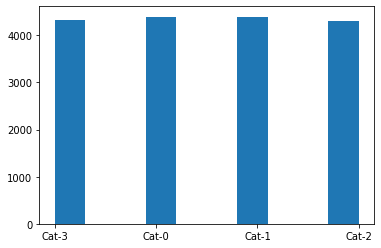

In [30]:
plt.hist(ycat)